In [1]:
import pandas as pd

df = pd.read_excel("both db.xlsx", sheet_name="summer")


In [3]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  744 non-null    object 
 1   PSSRa    744 non-null    float64
 2   PSSRb    744 non-null    float64
 3   RARSc    744 non-null    float64
 4   PSSRc    744 non-null    float64
 5   CARI     744 non-null    float64
 6   NDVI705  744 non-null    float64
 7   PSNDa    744 non-null    float64
 8   YI       744 non-null    float64
 9   RES      744 non-null    float64
 10  PRI      744 non-null    float64
 11  NDVIa    744 non-null    float64
 12  NDVIb    744 non-null    float64
dtypes: float64(12), object(1)
memory usage: 75.7+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI,NDVI705,PSNDa,YI,RES,PRI,NDVIa,NDVIb
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,6.931892,6.150310,5.377358,5.383945,1.407607,0.438281,0.719916,-0.007455,0.400472,0.039079,0.714388,0.711895
std,2.753838,2.433866,2.057148,2.055339,0.654347,0.092965,0.087538,0.003932,0.093192,0.015559,0.087137,0.087786
min,2.379702,2.342322,1.934046,1.913839,0.352701,0.167501,0.408232,-0.020068,0.214522,-0.003652,0.401591,0.392700
25%,5.118320,4.457897,3.972182,3.977449,0.957658,0.368625,0.673113,-0.009909,0.319985,0.028149,0.667548,0.665328
50%,6.140668,5.538846,4.870609,4.900425,1.217905,0.449190,0.719914,-0.007460,0.386674,0.038160,0.715838,0.713396
75%,7.936846,7.143334,6.277664,6.297254,1.772151,0.516768,0.776207,-0.005626,0.476209,0.049077,0.769067,0.767464
max,15.674217,15.186808,12.468778,12.375205,3.813228,0.638737,0.880054,0.011261,0.621575,0.080099,0.875159,0.874288


Free attempt - all indices - straightforward

Accuracy: 0.5369127516778524


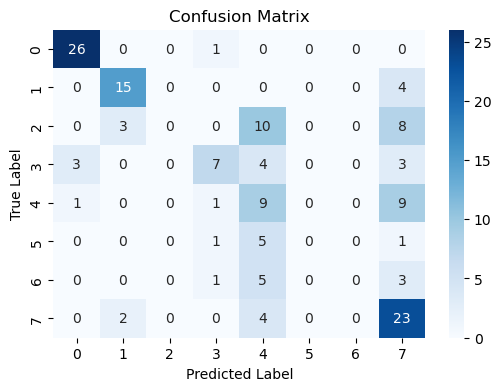

                CHEAL      CYPES  ECHCG      GASCI      Maize  Morello  \
CHEAL       96.296296   0.000000    0.0   3.703704   0.000000      0.0   
CYPES        0.000000  78.947368    0.0   0.000000   0.000000      0.0   
ECHCG        0.000000  14.285714    0.0   0.000000  47.619048      0.0   
GASCI       17.647059   0.000000    0.0  41.176471  23.529412      0.0   
Maize        5.000000   0.000000    0.0   5.000000  45.000000      0.0   
Morello      0.000000   0.000000    0.0  14.285714  71.428571      0.0   
Pignoletto   0.000000   0.000000    0.0  11.111111  55.555556      0.0   
SORHA        0.000000   6.896552    0.0   0.000000  13.793103      0.0   

            Pignoletto      SORHA  
CHEAL              0.0   0.000000  
CYPES              0.0  21.052632  
ECHCG              0.0  38.095238  
GASCI              0.0  17.647059  
Maize              0.0  45.000000  
Morello            0.0  14.285714  
Pignoletto         0.0  33.333333  
SORHA              0.0  79.310345  


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'species' is the target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify= y)

# Initialize and train the SVM classifier
# Here we use the RBF kernel; adjust 'C' and 'kernel' as needed
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)

# Evaluate the model
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

# Compute and plot the confusion matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute confusion matrix percentages for a detailed view
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print(cm_df)


In [9]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Example lists of species for each category
monocot_species = ["CYPES","ECHCG","Maize","SORHA","Pignoletto","Morello"]  # example species
dicot_species   = ["CHEAL","GASCI"]
weed_species    = ["CYPES","ECHCG","SORHA","CHEAL","GASCI"]  # example of some species labeled as weeds
crop_species    = ["Maize","Pignoletto","Morello"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["CYPES","ECHCG","SORHA"]
monocot_crop_species = [ "Maize","Pignoletto","Morello"]
dicot_weed_species   = ["CHEAL","GASCI"]

# Assume df is your main DataFrame with features and a 'species' column.
# Create first-level and second-level categories.
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Select features and target for level 1.
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI","PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y_cat1 = df["category1"]

# Level 1: Monocot vs. Dicot classification using SVM.
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = SVC(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)
y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1.
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

# Level 2 for Monocots: Train weed vs. crop classifier.
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]
X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(
    X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = SVC(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

# Level 2 for Dicots:
# Check if there is any crop data among dicots.
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]
if (y_dicot == 'crop').sum() > 0:
    X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(
        X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
    clf_cat2_dicot = SVC(random_state=42)
    clf_cat2_dicot.fit(X_train_di, y_train_di)
else:
    # If no dicot crop data, set level 2 for dicots to always predict 'weed'
    clf_cat2_dicot = None

# Level 3: Species-level classification models.
# Monocot-Weed model.
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]
clf_mono_weed = SVC(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model.
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]
clf_mono_crop = SVC(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model.
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]
clf_dicot_weed = SVC(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model: Train only if any dicot crop data exists.
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
if dicot_crop_mask.sum() > 0:
    X_dicot_crop = X[dicot_crop_mask]
    y_dicot_crop = df['species'][dicot_crop_mask]
    clf_dicot_crop = SVC(random_state=42)
    clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)
else:
    clf_dicot_crop = None

# Final species prediction using the hierarchical approach.
final_species_preds = []

for idx in X_test_cat1.index:
    # Level 1: Predict monocot/dicot.
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    
    if cat1_pred == 'monocot':
        # Level 2 (monocot): Use classifier to decide weed vs. crop.
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        # Level 2 (dicot): If classifier exists, use it; otherwise, default to 'weed'.
        if clf_cat2_dicot is not None:
            cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]
        else:
            cat2_pred = 'weed'
        # Level 3: Use dicot model based on level 2 decision.
        if cat2_pred == 'weed' or clf_dicot_crop is None:
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]
    
    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate final species-level accuracy.
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

# Optionally, display the confusion matrix (in percentages).
cm = confusion_matrix(y_test_species, final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test_species)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print(cm_df)


Final Species-Level Accuracy: 0.4563758389261745
                CHEAL      CYPES  ECHCG      GASCI      Maize  Morello  \
CHEAL       96.296296   0.000000    0.0   3.703704   0.000000      0.0   
CYPES        0.000000  61.904762    0.0   0.000000   4.761905      0.0   
ECHCG        0.000000  14.285714    0.0   0.000000  33.333333      0.0   
GASCI       35.294118   0.000000    0.0  23.529412  41.176471      0.0   
Maize        0.000000   0.000000    0.0   0.000000  90.909091      0.0   
Morello      0.000000   0.000000    0.0   0.000000  77.777778      0.0   
Pignoletto   0.000000   0.000000    0.0   0.000000  71.428571      0.0   
SORHA        0.000000  17.241379    0.0   0.000000  31.034483      0.0   

            Pignoletto      SORHA  
CHEAL              0.0   0.000000  
CYPES              0.0  33.333333  
ECHCG              0.0  52.380952  
GASCI              0.0   0.000000  
Maize              0.0   9.090909  
Morello            0.0  22.222222  
Pignoletto         0.0  28.57142